# MP1: Phasors

In this lab, you'll measure the amplitudes and phases of the harmonics of a musical instrument.  Then you'll use those harmonic amplitudes and phases to create phasors, add them together, and synthesize a musical tune.

In order to make sure everything works, you might want to go to the command line, and run

    pip install -r requirements.txt
    
This will install the modules that are used on the autograder, including numpy, h5py, and the gradescope utilities.

In [1]:
!pip install -r requirements.txt

---------------------------------------------------------------------
## Part 1: Measuring harmonic spectral levels (in dB)

First, let's load a violin note.  This sample is a violin, playing a middle-C note (C5), extracted from the file Violin.arco.mf.sulG.C5G5.aiff in the University of Iowa musical instrument database (http://theremin.music.uiowa.edu/MISviolin.html).

Text(0.5, 1.0, 'Violin Playing Middle C')

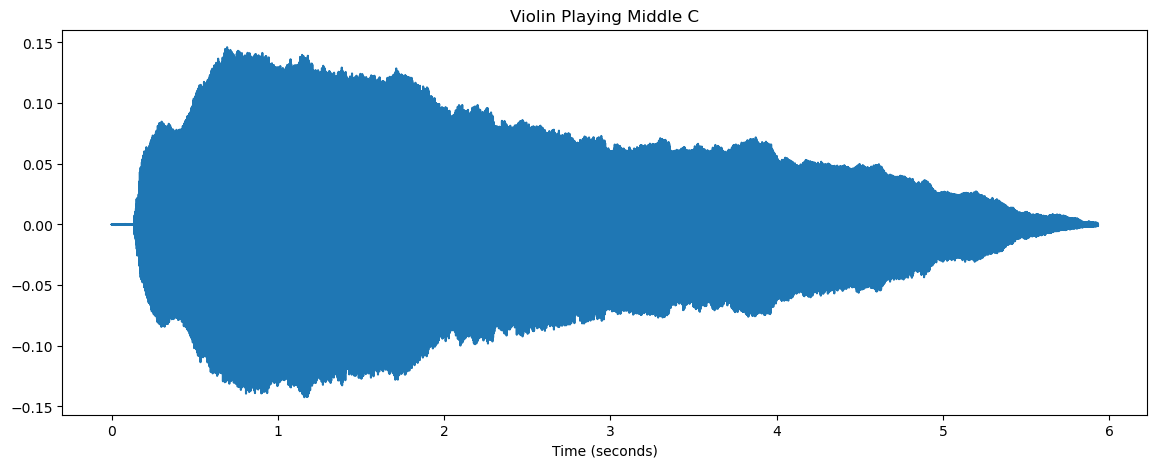

In [27]:
import soundfile as sf
violin, samplerate = sf.read('violin.wav')
import numpy as  np
time_axis = np.arange(len(violin))/samplerate
import matplotlib.pyplot as plt
plt.figure(figsize=(14, 5))
plt.plot(time_axis,violin)
plt.xlabel('Time (seconds)')
plt.title('Violin Playing Middle C')

We can also listen to it using IPython.display:

In [2]:
import IPython.display
IPython.display.Audio(violin,rate=samplerate)

Let's zoom in on part of it.

Text(0.5, 1.0, 'Violin Playing Middle C')

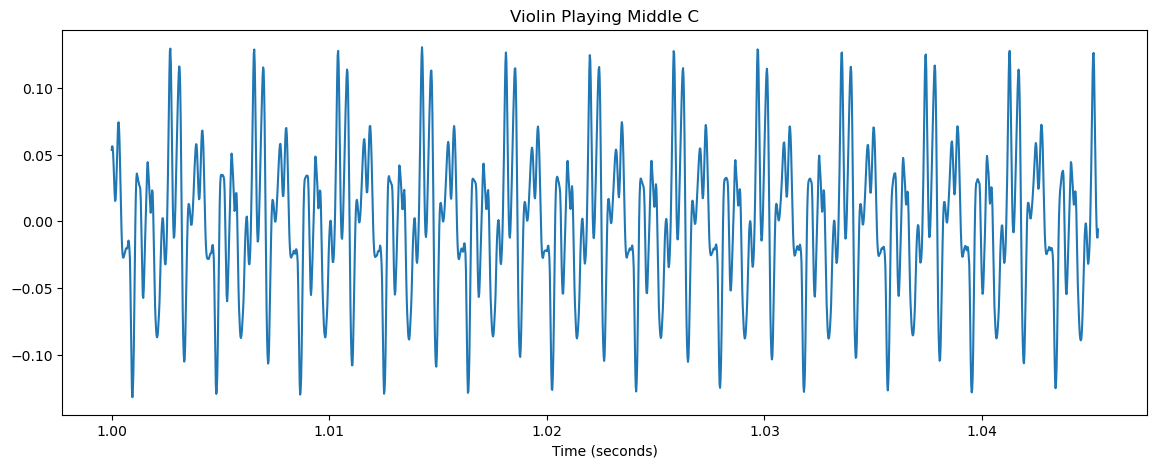

In [3]:
plt.figure(figsize=(14, 5))
plt.plot(time_axis[samplerate:samplerate+2000],violin[samplerate:samplerate+2000])
plt.xlabel('Time (seconds)')
plt.title('Violin Playing Middle C')

So, obviously, it's periodic.  That means that it is made up of the sum of many harmonics, each with a different amplitude and phase.  But how do you find its amplitudes and phases?

At this point, you should switch to Praat (https://www.fon.hum.uva.nl/praat/).
1. In the "Praat Objects" window, click the "Open" button, and choose "Read from file."  In the file browser that pops up, navigate to the directory containing the file "violin.wav," and choose it.  The words "Sound violin" should show up  in your "Praat Objects" window.
2. Click on "Sound violin," then click "View & Edit".
3. Click your mouse near the peak of the waveform, then click on the "Spectrum" button, and choose "View Spectral Slice".  You should see something that looks like the following.

![spectralslice](slice2.png)

Notice that, in the above spectrum, I've selected the fourth harmonic, so you can see that it is at a frequency of 1025Hz, and has a level of 30dB.  Do the same for all of the first eight harmonics, and change the following line so it correctly lists the levels of the first eight harmonics.

In [4]:
levels = [26.5, 32.9, 25.5, 29.3, 28.7, 14.9, 16.3, 3.3]

------------------------------------------------------------
## Part 2: Converting levels to amplitudes

At this point, we'll load the file `submitted.py`.

The file `submitted.py` is the only part of your work that the autograder will see. The only purpose of this notebook is to help you debug `submitted.py`.  Once you have revised `submitted.py` enough to make this notebook work, then you should go to the command line, and type `python run_tests.py`.  Once that command returns without errors, then  you can go ahead and submit your file `submitted.py` to the autograder.  You can submit to the autograder as often as you want, but it will save you trouble if you debug as much as you can on your local machine, before you submit to the autograder.

We will use `importlib` in order to reload your `submitted.py` over and over again.  That way, every time you make a modification in `submitted.py`, you can just re-run  the corresponding block of this notebook, and it will reload `submitted.py` with your modified code.  

Since the file is called `submitted.py`, python considers it to contain a module called `submitted`.  As shown, you can read the module's docstring by printing `submitted.__doc__`.  You can also type `help(submitted)` to get a lot of information about the module, including its docstring, a list of all the functions it defines, and all of their docstrings.  For  more about docstrings, see, for example, https://www.python.org/dev/peps/pep-0257/.

In [3]:
import submitted
import importlib
importlib.reload(submitted)
print(submitted.__doc__)


This is the module you'll submit to the autograder.

There are several function definitions, here, that raise RuntimeErrors.  You should replace
each "raise RuntimeError" line with a line that performs the function specified in the
function's docstring.



Now it's time for you to open `submitted.py`, and start editing it.  You can open it in another Jupyter window by choosing "Open from Path" from the "File" menu, and then typing `submitted.py`.  

Once you have it open, try editing the function `level_to_amplitude` so that its functionality matches its docstring.  Here is what it's docstring says:

In [6]:
help(submitted.level_to_amplitude)

Help on function level_to_amplitude in module submitted:

level_to_amplitude(levels)
    amplitudes = level_to_amplitudes(levels)

    levels - any array or list of levels, in dB
    amplitudes - a numpy array or list, of the same length, containing amplitudes



Remember that the relationship between levels and amplitudes is given by

$$\mbox{level} = 20 \log_{10}(\mbox{amplitudes})$$

Your goal is to invert that equation, so that, given levels, you return amplitudes.

Once you have performed that task correctly, the following code block should print the values 

    [0.001 0.1 1 10 100 1000]
    
(it might be printed in scientific notation).

In [7]:
importlib.reload(submitted)
amplitudes = submitted.level_to_amplitude([-60, -20, 0, 20, 40, 60])
print(amplitudes)

[0.001, 0.1, 1.0, 10.0, 100.0, 1000.0]


-------------------------------------
## Part 3: Creating phasors

A phasor is just a  complex number, $z=ae^{j\theta}$, where $a$ is some amplitude, and $\theta$ is some phase.  Open `submitted.py`, and modify the function `create_phasors` so that it does what its docstring says it should do.  Here's what its docstring says it should do:


In [8]:
importlib.reload(submitted)
help(submitted.create_phasors)

Help on function create_phasors in module submitted:

create_phasors(amplitudes, phases)
    phasors = create_phasors(amplitudes, phases)

    phases - an array or list of the same length, containing phase angles, in radians
    amplitudes - an array or list of amplitudes
    phasors - the resulting phasors = amplitude*exp(j*phases)



If you get it working, the following block should produce the result

    [ 1+0j  1+1j  0+2j -2+2j ]
    
(it might be written in scientific notation.  There might be some very small nonzero real part in the 2j term.)

In [9]:
importlib.reload(submitted)
phasors = submitted.create_phasors([1,np.sqrt(2),2,2*np.sqrt(2)], [0,np.pi/4,np.pi/2,3*np.pi/4])
print(phasors)

[(1+0j), (1.0000000000000002+1.0000000000000002j), (1.2246467991473532e-16+2j), (-2+2.0000000000000004j)]


-------------------------------------------------------------
## Part 4: Synthesizing a musical note

Now, let's synthesize a musical note!  The input will be a list of phasors, a fundamental frequency (in Hertz), a sampling rate (in samples/second), and a duration (in seconds).  The output is a musical note.

In [10]:
importlib.reload(submitted)
help(submitted.synthesize_note)

Help on function synthesize_note in module submitted:

synthesize_note(z, F0, Fs, d)
    x = synthesize_note(z, F0, Fs, d)

    z (array of length N) - an array or list of phasors, giving the amplitude and phase of each harmonic
    F0 (scalar) - the fundamental frequency, in Hertz
    Fs (scalar) - the sampling frequency, in samples/second
    d (scalar) - the duration, in seconds
    x (array of length Fs*d) - the synthesized signal

    This function creates one harmonic for each element of z, then adds them together to generate x.



Remember how you use phasors:

$$x(t) = \sum_{k=0}^{N-1} \Re\left\{ z[k]e^{j2\pi (k+1) F_0 t}\right\}$$

where $t$ is the time of the sample (in seconds), and $\Re\{...\}$ means "real part of ...", and the frequency of the $(k+1)^{\textrm{st}}$ harmonic is $(k+1)F_0$ (so for example, the first harmonic is at $F_0$, the second is at $2F_0$, and so on).  If your code is working, the following should print one period of a sine wave, which will look something like

    [ 0.00000000e+00  7.07106781e-01  1.00000000e+00  7.07106781e-01
      1.22464680e-16 -7.07106781e-01 -1.00000000e+00 -7.07106781e-01]


In [11]:
importlib.reload(submitted)
x = submitted.synthesize_note([-1j], 1, 8, 1)
print(x)

[6.123233995736766e-17, 0.7071067811865476, 1.0, 0.7071067811865476, 6.123233995736766e-17, -0.7071067811865475, -1.0, -0.7071067811865477]


The following should plot two periods of a square wave, approximated by its first nine harmonics (of which the even-numbered  harmonics all have zero amplitude, and the odd-numbered harmonics have amplitude of +/-1/n and phase of zero).

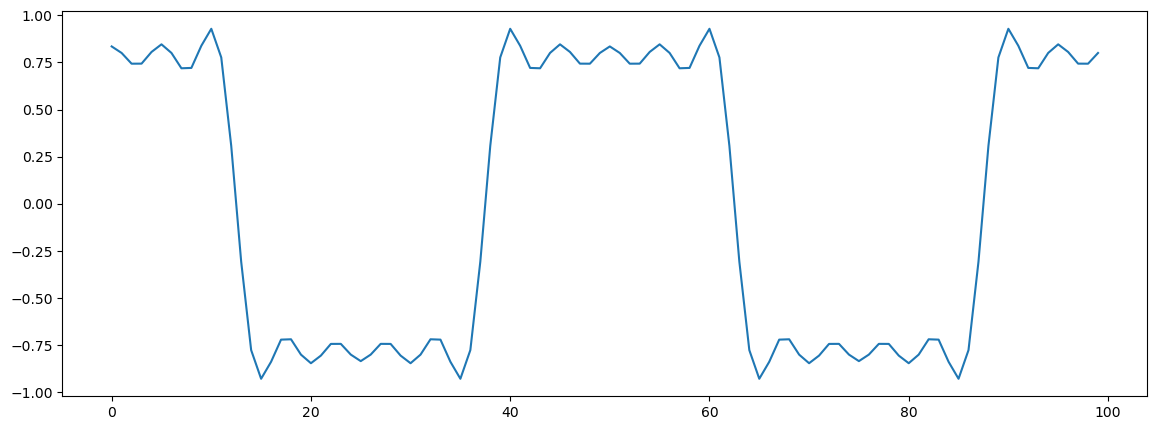

In [12]:
importlib.reload(submitted)
x = submitted.synthesize_note([1,0,-1/3,0,1/5,0,-1/7,0,1/9],2,100,1)
plt.figure(figsize=(14, 5))
plt.plot(x)

If you measured the amplitudes of your violin note accurately, up above, the following should generate an 0.5-second note that looks and sounds kind of like a violin.

Note that we're using 0 for the phases, so the waveform will look like it has the same approximate structure as a violin waveform, but with different symmetry -- the real violin is asymmetric in the time domain, but with 0-phase, the result has **even symmetry** in the time domain.  **Even symmetry** means that $x(t)=-x(-t)$, just like a cosine.

The human ear is not very sensitive to phase.  If you listen to the waveform, it should sound a lot like a violin.

The levels are [26.5, 32.9, 25.5, 29.3, 28.7, 14.9, 16.3, 3.3]
The corresponding signal amplitudes are [21.134890398366466, 44.157044735331255, 18.836490894898002, 29.174270140011675, 27.227013080779127, 5.559042572704036, 6.531305526474725, 1.462177174456718]
The phasors are [(21.134890398366466+0j), (44.157044735331255+0j), (18.836490894898002+0j), (29.174270140011675+0j), (27.227013080779127+0j), (5.559042572704036+0j), (6.531305526474725+0j), (1.462177174456718+0j)]


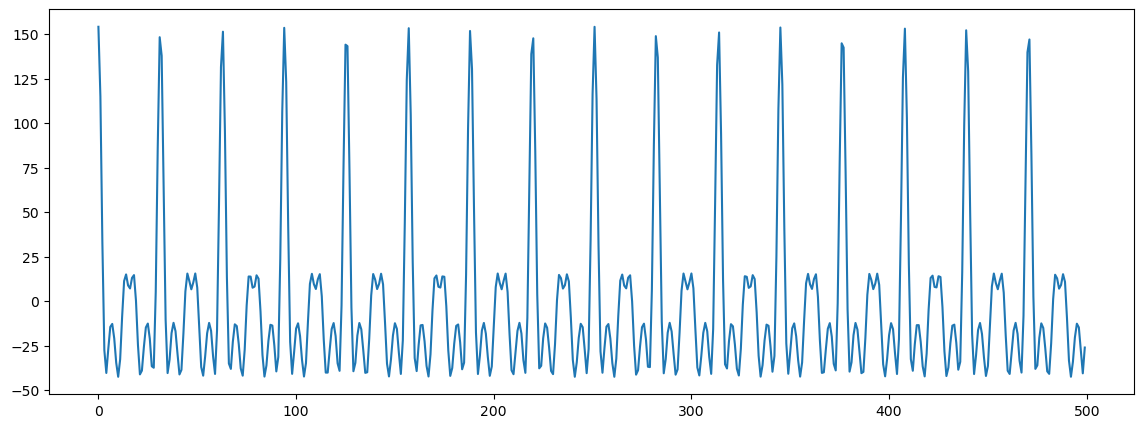

In [13]:
importlib.reload(submitted)
print('The levels are',levels)
amplitudes = submitted.level_to_amplitude(levels)
print('The corresponding signal amplitudes are',amplitudes)
phasors = submitted.create_phasors(amplitudes, np.zeros(len(amplitudes)))
print('The phasors are',phasors)
x = submitted.synthesize_note(phasors, 255, 8000, 1)
plt.figure(figsize=(14, 5))
plt.plot(x[:500])

In [14]:
import IPython.display
IPython.display.Audio(x,rate=8000)

In order to make the whole note sound more like a violin, the following code multiplies the whole note by a Hamming window.  That serves to give the note a gradual onset, and a gradual offset; otherwise, it would start and end suddenly.

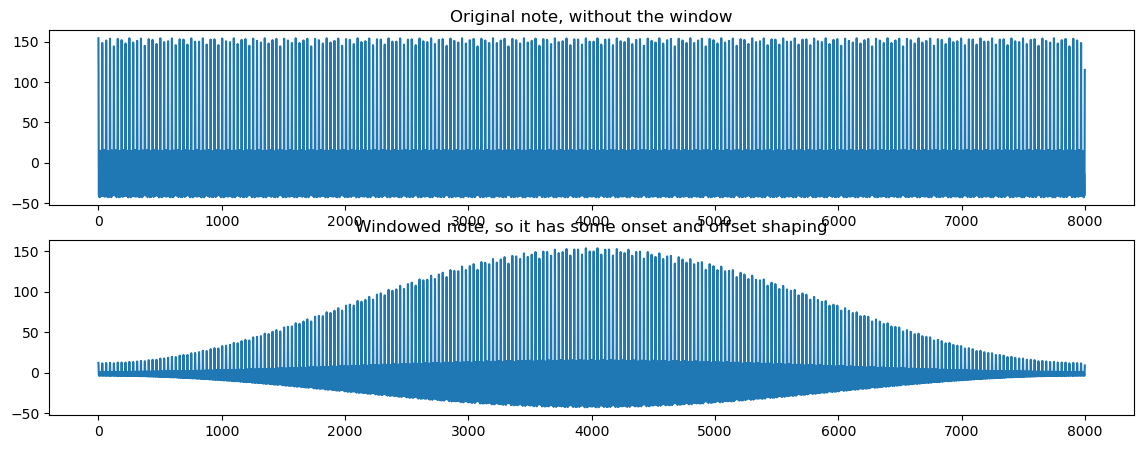

In [15]:
note = x * np.hamming(len(x))
plt.figure(figsize=(14, 5))
plt.subplot(2,1,1)
plt.plot(x)
plt.title('Original note, without the window')
plt.subplot(2,1,2)
plt.plot(note)
plt.title('Windowed note, so it has some onset and offset shaping')
import soundfile
sf.write('note.wav',note/np.amax(np.abs(note)),samplerate=8000)

In [16]:
import IPython.display as ipd
ipd.Audio(note, rate=8000)

-----------------------------------------------------------
## Part 5: Converting note names into fundamental frequencies

You've been provided with a  file named `note2f0.py` that contains a dict, `note2f0.F0`.  You can use it to look up the fundamental frequency of a note by name, as follows:

In [17]:
import note2f0
print(note2f0.F0['C4'],note2f0.F0['A4'],note2f0.F0['C5'])

261.63 440.0 523.25


Use it to create a function `submitted.names_to_F0` with the following signature:

In [18]:
importlib.reload(submitted)
help(submitted.names_to_fundamentals)

Help on function names_to_fundamentals in module submitted:

names_to_fundamentals(names)
    F0 = names_to_fundamentals(names)

    names - a list of names of notes, e.g., ['D#4','G#4','F4','G4','F4']
    fundamentals - a list of the corresponding fundamental frequencies, in Hertz, e.g., [311.13, 415.3, 349.23, 392.0, 349.23]



If it works, the following block should produce a result something like

    [311.13, 415.3, 349.23, 392.0, 349.23]

In [19]:
importlib.reload(submitted)
fundamentals = submitted.names_to_fundamentals(['D#4','G#4','F4','G4','F4','D#4','G#4','F4','G4'])
print(fundamentals)

[311.13, 415.3, 349.23, 392.0, 349.23, 311.13, 415.3, 349.23, 392.0]


-----------------------------------------------------------------------------
## Part 6: Synthesizing a Tune

The last part of this MP will synthesize a song.  You'll do that synthesizing a sequence of violin notes, then sequencing them to create the song.

In [20]:
importlib.reload(submitted)
help(submitted.synthesize_song)

Help on function synthesize_song in module submitted:

synthesize_song(fundamentals, beats, bpm, Fs, phasors)
    song = synthesize_song(fundamentals, beats, bpm, Fs, phasors)

    fundamentals (array) - fundamental frequencies of the notes to be played
    beats (array) - duration of each note, in beats, e.g., [1,3/4,1/4,1,1]
    bpm (scalar) - number of beats per minute
    Fs (scalar) - number of samples per second
    phasors (list or array) - amplitude and phase of each harmonic
    song (numpy array)  - the returned song

    This function should first use beats and bpm to figure out the durations of the notes, in seconds.
    Then, for each note, it should:
        (1) call synthesize_note, to synthesize the note
        (2) call np.hanning, to create a hanning window, and multiply it by the note
        (3) call np.concatenate to concatenate the note  onto the song



If it works, the following blocks should synthesize the first two bars of "Hail to the Orange".

note synthesized and appended in 0.4523320198059082ms
note synthesized and appended in 0.33152198791503906ms
note synthesized and appended in 0.1239004135131836ms
note synthesized and appended in 0.442629337310791ms
note synthesized and appended in 0.4850013256072998ms
note synthesized and appended in 0.471848726272583ms
note synthesized and appended in 0.34894728660583496ms
note synthesized and appended in 0.11234259605407715ms
note synthesized and appended in 0.8848221302032471ms


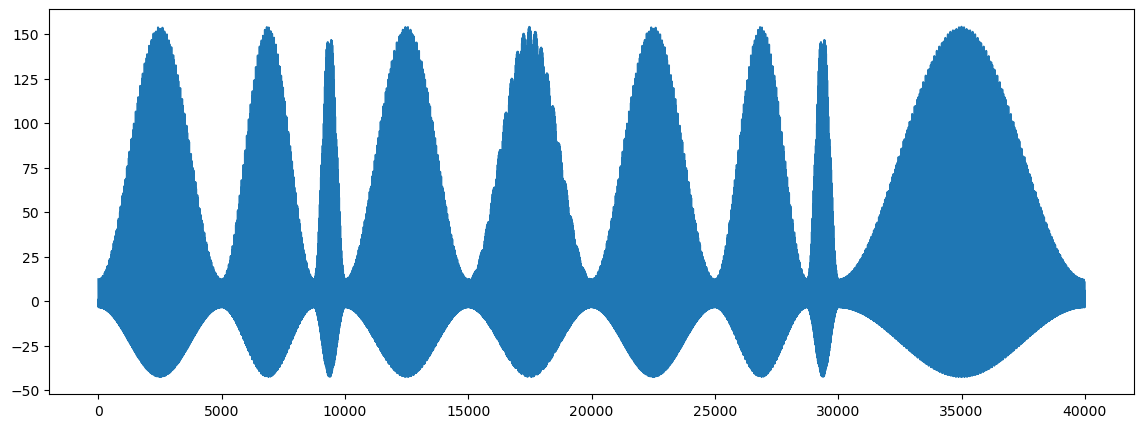

In [44]:
importlib.reload(submitted)
notes = ['D#4','G#4','F4','G4','F4','D#4','G#4','F4','G4']
fundamentals = submitted.names_to_fundamentals(notes)
beats = [1, 3/4, 1/4, 1, 1, 1, 3/4, 1/4, 2]
song = submitted.synthesize_song(fundamentals, beats, 96, 8000, phasors)
plt.figure(figsize=(14, 5))
plt.plot(song)
import soundfile as sf
sf.write('song.wav',song/np.amax(np.abs(song)),samplerate=8000)

In [31]:
import IPython.display as ipd
ipd.Audio(song, rate=8000)

-----------------------------------------------------
## Part 8: Grade your code on your own machine before submitting it!

If you reached this point in the notebook, then probably your code is working well, but before you run the autograder on  the  server, you should first run it on your own machine.

You can do that by going to a  terminal, and running the  following command line: `python grade.py`, or equivalently by running the following block, which uses the exclamation point (!) to run a terminal command:


In [1]:
!python grade.py

beat 0: 0.22984825654910002 = 60 * 0.36775721047856 / 96
beat 1: 0.4887176660481656 = 60 * 0.7819482656770649 / 96
beat 2: 1.213843206838194 = 60 * 1.9421491309411103 / 96
beat 3: 0.7014883807711337 = 60 * 1.122381409233814 / 96
beat 4: 1.2498482632497172 = 60 * 1.9997572211995476 / 96
beat 5: 0.6888828279777535 = 60 * 1.1022125247644055 / 96
beat 6: 0.34991624313333264 = 60 * 0.5598659890133322 / 96
beat 7: 1.2420007396888806 = 60 * 1.9872011835022088 / 96
beat 8: 0.6586339150479946 = 60 * 1.0538142640767914 / 96
beat 9: 1.116262706890898 = 60 * 1.7860203310254368 / 96
beat 10: 1.0990084796068709 = 60 * 1.7584135673709935 / 96
beat 11: 0.36980000527750034 = 60 * 0.5916800084440006 / 96
beat 12: 0.9136735132414903 = 60 * 1.4618776211863844 / 96
beat 13: 0.7126845439363164 = 60 * 1.1402952702981064 / 96
beat 14: 0.05454173786527183 = 60 * 0.08726678058443493 / 96
beat 15: 0.5424200205610357 = 60 * 0.867872032897657 / 96
beat 16: 0.0002363699425925181 = 60 * 0.00037819190814802894 / 96
b

...FF
FAIL: test_synthesize_note (test_visible.TestStep.test_synthesize_note)
----------------------------------------------------------------------
Traceback (most recent call last):
  File "C:\Users\juliusbenson\src\ECE401\mp1\tests\test_visible.py", line 43, in test_synthesize_note
    self.assertAlmostEqual(
AssertionError: 1.1279020320588873 != 9.250509692228045 within 1 places (8.122607660169157 difference) : 
*** synthesize_note([ 0.85148088+0.53834817j  0.89633931-0.21779103j  0.66360517-0.79402347j
  0.36027915+1.06930067j  0.7733391 +0.31818135j  0.57739114+0.93786872j
  1.1260458 +0.09383813j  0.14469799+1.24683436j -0.951831  +0.21764461j
  0.76067348-0.43627659j], 333, 27714, 0.5319976579404712), sample 3813, should be 1.1279020320588873

FAIL: test_synthesize_song (test_visible.TestStep.test_synthesize_song)
----------------------------------------------------------------------
Traceback (most recent call last):
  File "C:\Users\juliusbenson\src\ECE401\mp1\tests\test_visi

But  suppose that something didn't work well.  For example, suppose you run `python grade.py`, and you get the following:

This error message means that the function `test_synthesize_song`, in the file `tests/test_visible.py`, failed (all of the other tests succeeded -- only that one failed).

The error message specifies that `synthesize_song` was called with the following parameters:
    [ 220.    329.63   17.32  698.46   20.6    41.2   116.54   55.     46.25
      41.2  3520.   1396.91   16.35  466.16  329.63 4186.01   82.41  246.94
      311.13  311.13],
    [0.1981401  0.1537068  1.28657637 1.72814063 1.34908962 1.77778565
     0.20913126 0.71278756 1.08220118 1.05674697 0.81888192 1.27969944
     0.76927221 1.33997218 1.38888085 0.72640863 0.70723419 1.63271861
     0.95165971 1.62999141],
     89,
     18586,
     [ 0.94385485-0.21474033j  1.05689668-0.33092966j  0.335067  +0.86765753j
      0.93081609-0.15036639j  0.5054813 +0.63242576j -0.38066782+0.87194557j
      0.89222872+0.6459836j  -0.88226954+0.83670909j  0.10012949-0.94724238j
      1.02861232-0.4692548j ]
      
With those inputs, it created a signal whose 4130'th sample should have been 0.16870767993167918.  What  value was produced instead?  If you look at the line starting `AssertionError`, you can see that the function  produced a sample with the incorrect value of 0.08435383996583959.

How can you debug this?  

The first thing to do is to run your solution here, in the notebook, to see what answer  you're getting.

beat 0: 0.22984825625000002	= 60 * 0.36775721 / 96
beat 1: 0.48871766624999996	= 60 * 0.781948266 / 96
beat 2: 1.21384320625	= 60 * 1.94214913 / 96
beat 3: 0.70148838125	= 60 * 1.12238141 / 96
beat 4: 1.2498482625	= 60 * 1.99975722 / 96
beat 5: 0.688882825	= 60 * 1.10221252 / 96
beat 6: 0.34991624312499997	= 60 * 0.559865989 / 96
beat 7: 1.2420007375	= 60 * 1.98720118 / 96
beat 8: 0.6586339125	= 60 * 1.05381426 / 96
beat 9: 1.11626270625	= 60 * 1.78602033 / 96
beat 10: 1.09900848125	= 60 * 1.75841357 / 96
beat 11: 0.36980000499999993	= 60 * 0.591680008 / 96
beat 12: 0.9136735125000001	= 60 * 1.46187762 / 96
beat 13: 0.71268454375	= 60 * 1.14029527 / 96
beat 14: 0.054541737874999996	= 60 * 0.0872667806 / 96
beat 15: 0.542420020625	= 60 * 0.867872033 / 96
beat 16: 0.0002363699425	= 60 * 0.000378191908 / 96
beat 17: 0.070131053125	= 60 * 0.112209685 / 96
beat 18: 0.380573411875	= 60 * 0.608917459 / 96
beat 19: 0.578194635625	= 60 * 0.925111417 / 96
0.22984825625000002	sec note (6370.01457

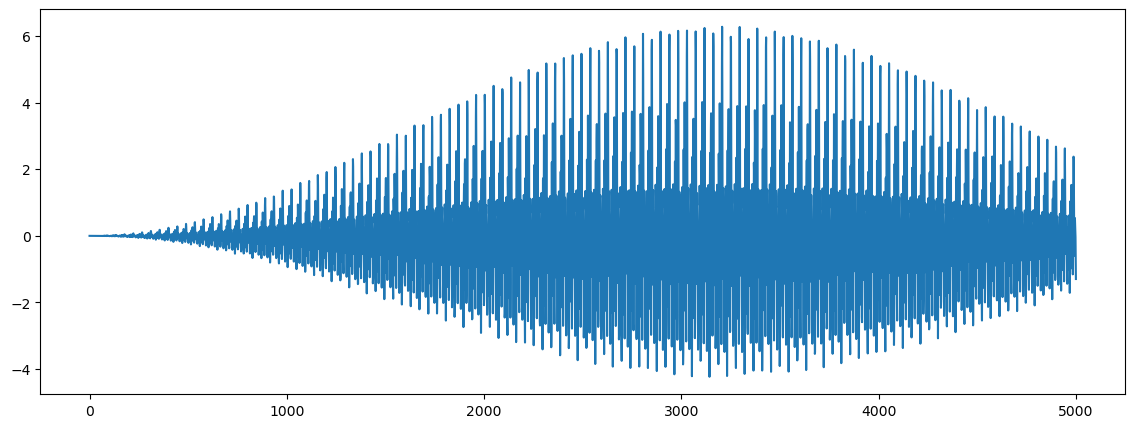

In [19]:
importlib.reload(submitted)
song = submitted.synthesize_song([ 622.25,  739.99,  277.18, 3135.96,   82.41,   55.,   4434.92,   98.,   4434.92,
   51.91,   55.,     21.83, 4434.92,   98.,     43.65,   23.12,   17.32,  246.94,
   29.14, 6644.88],[3.67757210e-01, 7.81948266e-01, 1.94214913e+00, 1.12238141e+00,
 1.99975722e+00, 1.10221252e+00, 5.59865989e-01, 1.98720118e+00,
 1.05381426e+00, 1.78602033e+00, 1.75841357e+00, 5.91680008e-01,
 1.46187762e+00, 1.14029527e+00, 8.72667806e-02, 8.67872033e-01,
 3.78191908e-04, 1.12209685e-01, 6.08917459e-01, 9.25111417e-01],96,27714,[ 0.85148088+0.53834817j,  0.89633931-0.21779103j,  0.66360517-0.79402347j,
  0.36027915+1.06930067j,  0.7733391 +0.31818135j,  0.57739114+0.93786872j,
  1.1260458 +0.09383813j,  0.14469799+1.24683436j, -0.951831  +0.21764461j,
  0.76067348-0.43627659j])
plt.figure(figsize=(14, 5))
plt.plot(song[:5000])

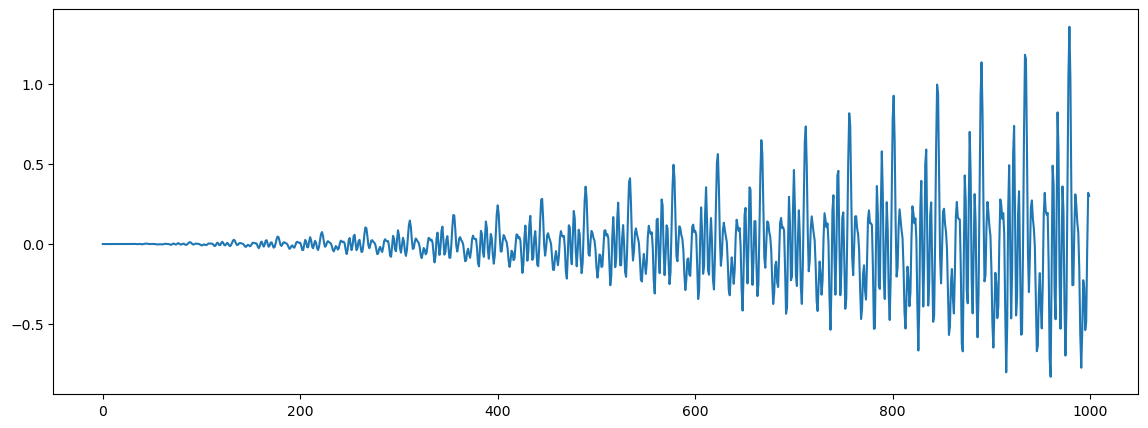

In [20]:
plt.figure(figsize=(14, 5))
plt.plot(song[:1000])

Now let's compare that to the solution that the autograder was expecting.

The solutions the autograder was expecting are in the  file `solutions.hdf5`. You are strongly  encouraged to browse that file, in case you need to debug any problems with the autograder.  First, make sure that you have the module `h5py` installed on your computer:

In [34]:
!pip install h5py

In [7]:
import h5py
with h5py.File('solutions.hdf5','r') as f:
    print(list(f.keys()))

['F0', 'Fs', 'amplitudes', 'beats', 'bpm', 'd', 'fundamentals', 'levels', 'note', 'phases', 'song', 'z']


As  you can see, this file contains a lot of objects, created during a sample run of the solution code with random parameters.  Let's plot the song that it was expecting:

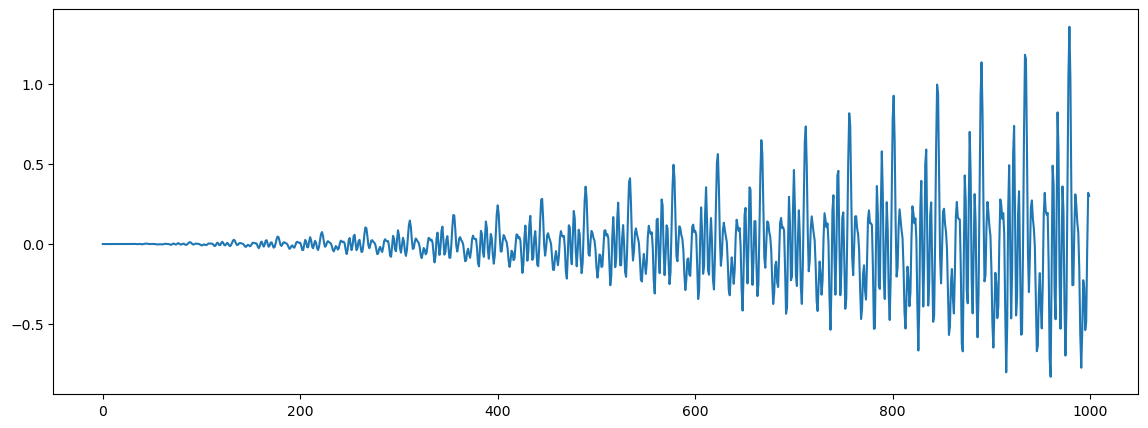

In [21]:
with h5py.File('solutions.hdf5','r')  as f:
    plt.figure(figsize=(14, 5))
    plt.plot(f['song'][:1000])

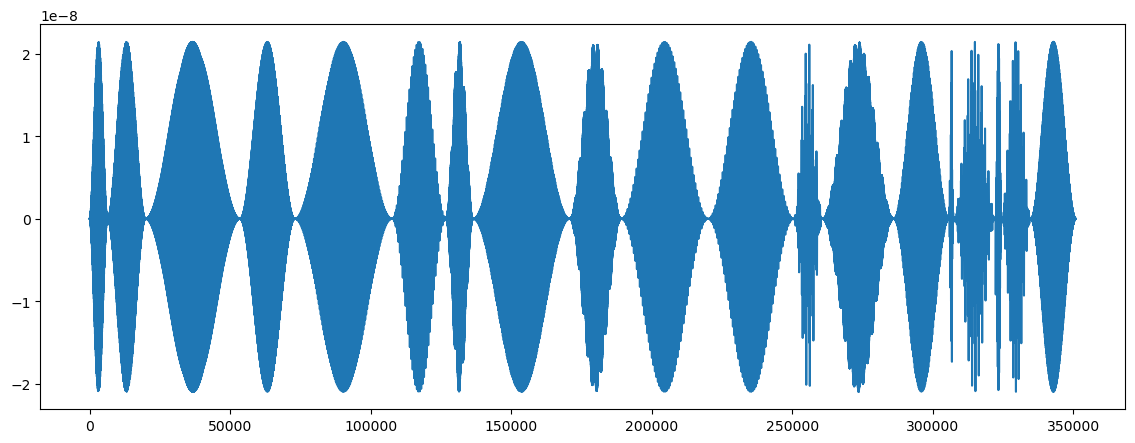

In [23]:
with h5py.File('solutions.hdf5','r')  as f:
    plt.figure(figsize=(14, 5))
    diff = np.subtract(f['song'][:],song)
    plt.plot(diff[:])

When gradescope grades your code, it will run `grade.py`.  It will test your code using the solutions in `solutions.hdf5`, and using the test code `tests/test_visible.py`.  It will also test your code using some *hidden* tests.  The hidden tests are actually exactly the same as those in `tests/test_visible.py`, but with different input parameters.

---------------------
## Extra Credit

You can earn up to 10%  extra credit on this MP by finishing the file called `extra.py`, and submitting it to the autograder.

This file has just one function, called `extra.fourier_series_coefficients`, with the following signature:

In [24]:
import extra
help(extra.fourier_series_coefficients)

Help on function fourier_series_coefficients in module extra:

fourier_series_coefficients(x, F0, Fs, N)
    phasors = fourier_series_coefficients(x, F0, Fs, N)

    x (numpy array) - the input signal
    F0 (scalar) - the fundamental frequency, in Hertz
    Fs (scalar) - sampling frequency, in samples/second
    N (scalar) - number of harmonics to measure
    phasors (length-N array) - Fourier series coefficients

    This should compute only the positive-frequency Fourier series coefficients
    (for k=1 through k=N).  Assume that the first sample of the input signal, x[0],
    is at time 0; the second sample, x[1], is at time 1/Fs, and so on.

    Instead of averaging over one period, you should average over the
    whole signal length.  So you should multiply x by the complex
    conjugate of each harmonic, then add over the whole signal length,
    then divide by the length of the signal.



Remember that the Fourier series coefficients are normally defined as

$$X_k = \frac{1}{T_0} \int_0^{T_0} x(t) e^{-j2\pi ktF_0}dt$$

In order to summarize information over the entire length of the input signal, though, let's average over the entire input signal length, thus

$$X_k = \frac{1}{L} \sum_{n=0}^{L-1} x[n] e^{-j2\pi knF_0/F_s}$$

where $L$ is the length of the signal, and $F_s$ is the sampling frequency (samples/second).

When you think you have it working, you can test it by running:

    python grade.py
    
in your terminal.  Yes, indeed, this is the same code you ran for the regular MP!  The only difference is that, when you unzipped `mp1_extra.zip`, it gave you the test file `tests/text_extra.py`.  So now, when you run `grade.py`, it will grade both your regular MP, and the extra credit part.

Incidentally, what is this test doing?  It is testing to see if your analysis of the violin results in the right phasors.  The violin is playing a middle C, which has an $F_0=261.63$.  Its sampling frequency is $F_s=44100$.  The results look something like this:

In [56]:
importlib.reload(extra)
phasors = extra.fourier_series_coefficients(violin, 261.63, 44100, 8)
print(phasors)

(-2.6468473434812727e-05+0j)
(0.0001121287634050298+0.00011345836265306038j)
(-6.604678485453633e-07-7.318853474383608e-06j)
(6.461029225635584e-05+5.661180149979325e-05j)
(1.37028286505519e-06+4.3805823486981194e-06j)
(-7.611540555404303e-06+4.38417659236212e-06j)
(-1.2528290445577443e-06-9.669759486645739e-06j)
(-2.364857158672899e-06+1.7083661806468242e-06j)
[(-2.6468473434812727e-05+0j), (0.0001121287634050298+0.00011345836265306038j), (-6.604678485453633e-07-7.318853474383608e-06j), (6.461029225635584e-05+5.661180149979325e-05j), (1.37028286505519e-06+4.3805823486981194e-06j), (-7.611540555404303e-06+4.38417659236212e-06j), (-1.2528290445577443e-06-9.669759486645739e-06j), (-2.364857158672899e-06+1.7083661806468242e-06j)]


In order to find something a little closer to what we're used to, let's compute the levels of these eight notes. Since these are computed from the whole file, we'll add 120dB to the levels, in order to account for the effect of averaging over the entire file:

In [37]:
print(120+20*np.log10(np.abs(phasors)))

[28.45457788 44.05613714 17.32408509 38.68020224 13.23606341 18.87372823
 19.78060986  9.29983876]


Well!  These levels, averaged over the whole file, are pretty different from what we measured right at the peak using Praat.  There are some similarities, though: for example, the 1st, 3rd, 6th and 8th harmonics have high amplitude, while the 2nd, 4th, 5th, and 7th harmonics are smaller.  

Congratulations!  That's the end of MP1.  Good luck!

In [38]:
import h5py
with h5py.File('extra_solutions.hdf5','r') as f:
    print(list(f.keys()))

['F0', 'Fs', 'N', 'phasors', 'x']


In [47]:
with h5py.File('extra_solutions.hdf5','r')  as f:
    print(f['phasors'][:])

[ 1.07666446e-07-7.06092523e-06j  6.58809610e-07+3.82829558e-06j
  9.68346572e-06-1.35328535e-05j  1.55817349e-05+9.63912366e-06j
 -9.78705139e-06-1.29047833e-05j -5.14858226e-07+3.23587693e-06j
 -4.82845818e-06+5.49889323e-07j  1.29477206e-05+4.35424168e-07j]


In [58]:
importlib.reload(extra)
with h5py.File('extra_solutions.hdf5','r')  as f:
    phasors = extra.fourier_series_coefficients(f['x'][:],523.25,44100,8)
    print(phasors)

(-2.6468473434812727e-05+0j)
(1.0766644621274116e-07-7.0609252258676615e-06j)
(6.588096102495731e-07+3.828295581843207e-06j)
(9.683465717356896e-06-1.353285346035799e-05j)
(1.5581734928990117e-05+9.639123664817546e-06j)
(-9.787051387766134e-06-1.2904783297356461e-05j)
(-5.148582264155754e-07+3.235876927353557e-06j)
(-4.8284581773005966e-06+5.498893230954921e-07j)
(1.2947720598112401e-05+4.354241681968944e-07j)
[(1.0766644621274116e-07-7.0609252258676615e-06j), (6.588096102495731e-07+3.828295581843207e-06j), (9.683465717356896e-06-1.353285346035799e-05j), (1.5581734928990117e-05+9.639123664817546e-06j), (-9.787051387766134e-06-1.2904783297356461e-05j), (-5.148582264155754e-07+3.235876927353557e-06j), (-4.8284581773005966e-06+5.498893230954921e-07j), (1.2947720598112401e-05+4.354241681968944e-07j)]
